In [167]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.feature_selection import SelectKBest,f_regression,mutual_info_regression
from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeClassifier
# from xgboost import XGBRegressor

from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.model_selection import RepeatedKFold

from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV

from scipy import stats
# import shap
import joblib

In [168]:
df = pd.read_csv("../Dataset/WildBlueberryPollinationSimulationData.csv")

In [169]:
df

,Row#,clonesize,honeybee,bumbles,andrena,osmia,MaxOfUpperTRange,MinOfUpperTRange,AverageOfUpperTRange,MaxOfLowerTRange,MinOfLowerTRange,AverageOfLowerTRange,RainingDays,AverageRainingDays,fruitset,fruitmass,seeds,yield
0,0,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,16.00,0.26,0.410652,0.408159,31.678898,3813.165795
1,1,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,1.00,0.10,0.444254,0.425458,33.449385,4947.605663
2,2,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,16.00,0.26,0.383787,0.399172,30.546306,3866.798965
3,3,37.5,0.750,0.250,0.250,0.250,94.6,57.2,79.0,68.2,33.0,55.9,1.00,0.10,0.407564,0.408789,31.562586,4303.943030
4,4,37.5,0.750,0.250,0.250,0.250,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.354413,0.382703,28.873714,3436.493543
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
772,772,10.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.486815,0.428012,33.447471,5333.873335
773,773,40.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,3.77,0.06,0.342841,0.377915,28.462005,3373.436842
774,774,20.0,0.537,0.117,0.409,0.058,86.0,52.0,71.9,62.0,30.0,50.8,24.00,0.39,0.404617,0.401670,30.748240,4203.027624
775,775,20.0,0.537,0.117,0.409,0.058,89.0,39.0,65.6,66.0,28.0,45.3,3.77,0.06,0.401538,0.399935,30.582161,4166.299735


In [170]:
df.shape

(777, 18)

In [171]:
df.drop(['Row#'],axis=1,inplace=True)
df.columns=df.columns.str.lower()

In [172]:
df.nunique()

clonesize                 6
honeybee                  7
bumbles                  10
andrena                  12
osmia                    12
maxofuppertrange          5
minofuppertrange          5
averageofuppertrange      5
maxoflowertrange          5
minoflowertrange          5
averageoflowertrange      5
rainingdays               5
averagerainingdays        5
fruitset                777
fruitmass               777
seeds                   777
yield                   777
dtype: int64

In [173]:
df.isna().sum()

clonesize               0
honeybee                0
bumbles                 0
andrena                 0
osmia                   0
maxofuppertrange        0
minofuppertrange        0
averageofuppertrange    0
maxoflowertrange        0
minoflowertrange        0
averageoflowertrange    0
rainingdays             0
averagerainingdays      0
fruitset                0
fruitmass               0
seeds                   0
yield                   0
dtype: int64

In [215]:
stat_df=df.describe()
stat_df=stat_df.T[['min','max']]
stat_df.to_csv("../Dataset/stat.csv")

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 777 entries, 0 to 776
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   clonesize             777 non-null    float64
 1   honeybee              777 non-null    float64
 2   bumbles               777 non-null    float64
 3   andrena               777 non-null    float64
 4   osmia                 777 non-null    float64
 5   averageofuppertrange  777 non-null    float64
 6   averageoflowertrange  777 non-null    float64
 7   averagerainingdays    777 non-null    float64
 8   fruitset              777 non-null    float64
 9   fruitmass             777 non-null    float64
 10  seeds                 777 non-null    float64
 11  yield                 777 non-null    float64
dtypes: float64(12)
memory usage: 78.9 KB


In [176]:
df.drop_duplicates(inplace=True)

In [177]:
def missing_values_table(df):
    # Total missing values
    mis_val = df.isnull().sum()

    # Percentage of missing values
    mis_val_percent = 100 * df.isnull().sum() / len(df)

    # Make a table with the results
    mis_val_table = pd.concat([mis_val, mis_val_percent], axis=1)

    # Rename the columns
    mis_val_table_ren_columns = mis_val_table.rename(
        columns={0: 'Missing Values', 1: '% of Total Values'})

    # Sort the table by percentage of missing descending
    mis_val_table_ren_columns = mis_val_table_ren_columns[
        mis_val_table_ren_columns.iloc[:, 1] != 0].sort_values(
        '% of Total Values', ascending=False).round(1)
    # Print some summary information
    print("Your selected dataframe has " + str(df.shape[1]) + " columns.\n"
                                                              "There are " + str(mis_val_table_ren_columns.shape[0]) +
          " columns that have missing values.")

    # Return the dataframe with missing information
    return mis_val_table_ren_columns


In [178]:
missing_values_table_df = missing_values_table(df)
missing_values_table_df

Your selected dataframe has 17 columns.
There are 0 columns that have missing values.


,Missing Values,% of Total Values


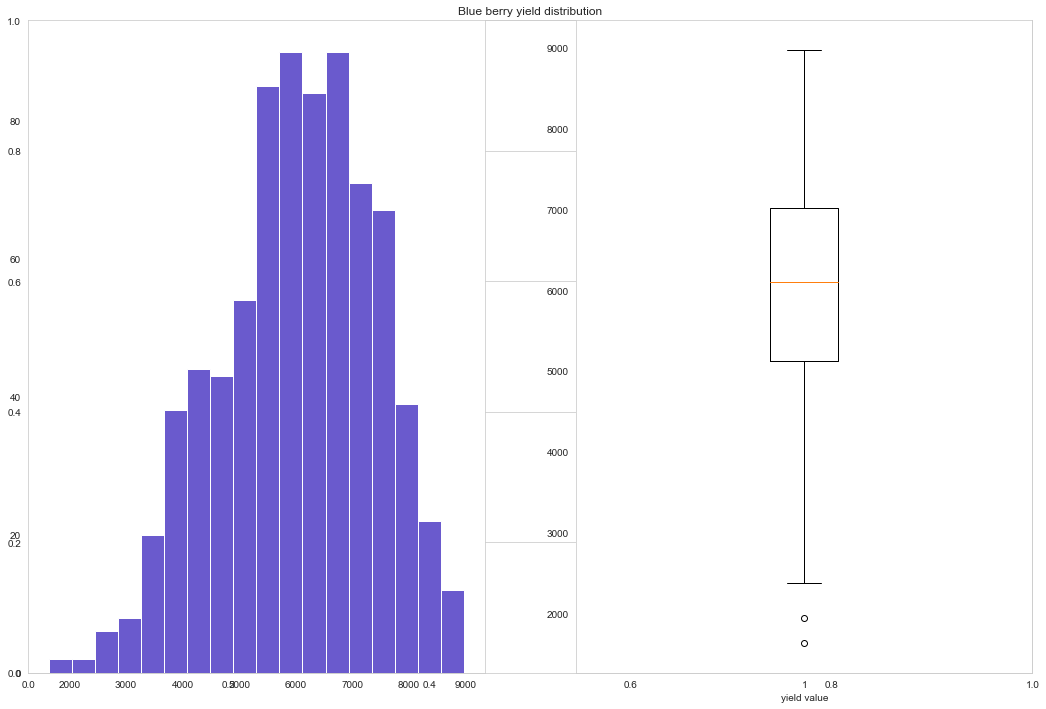

In [179]:
fig =plt.figure(figsize=(18,12))
plt.title("Blue berry yield distribution")
ax1 =fig.add_subplot(121)
ax2 =fig.add_subplot(122)

ax1.grid(False)
ax2.grid(False)
ax1.hist(df["yield"],color="slateblue",bins=18)
ax2.boxplot(df["yield"])
plt.xlabel("yield value")
plt.show()

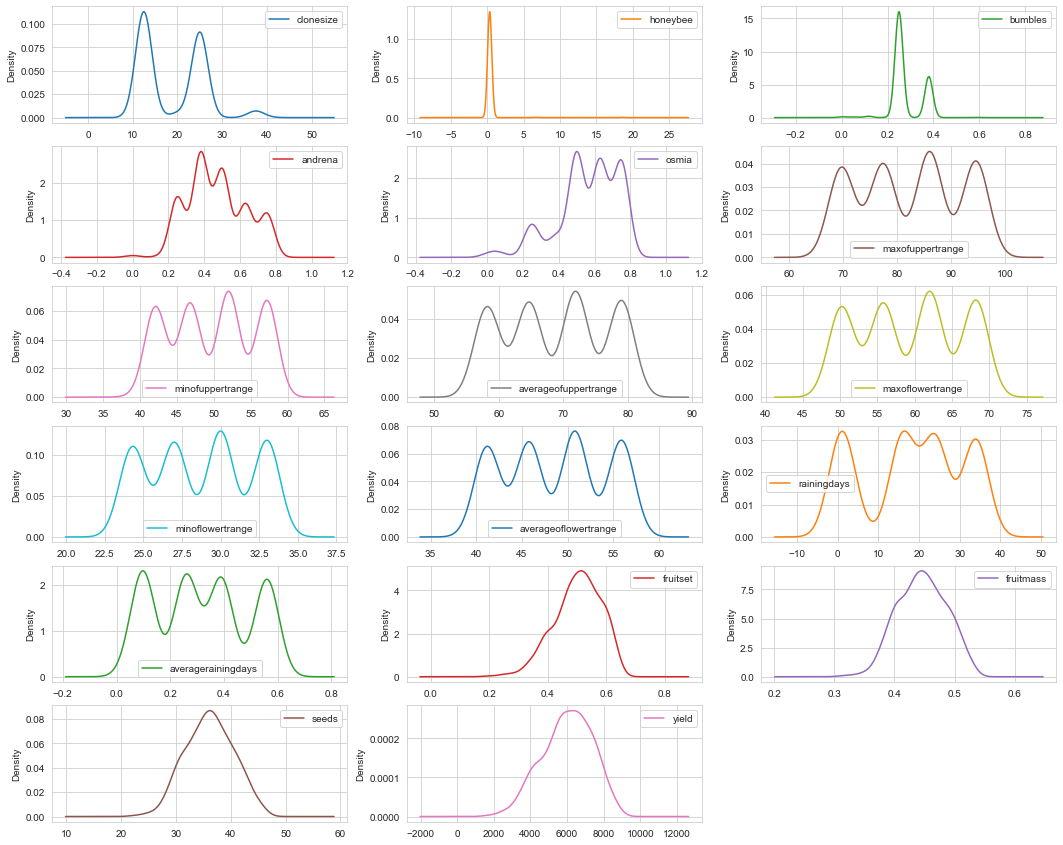

In [180]:
df.plot(kind="density",subplots=True,sharex=False,layout=(6,3),figsize=(18,15))
plt.show()

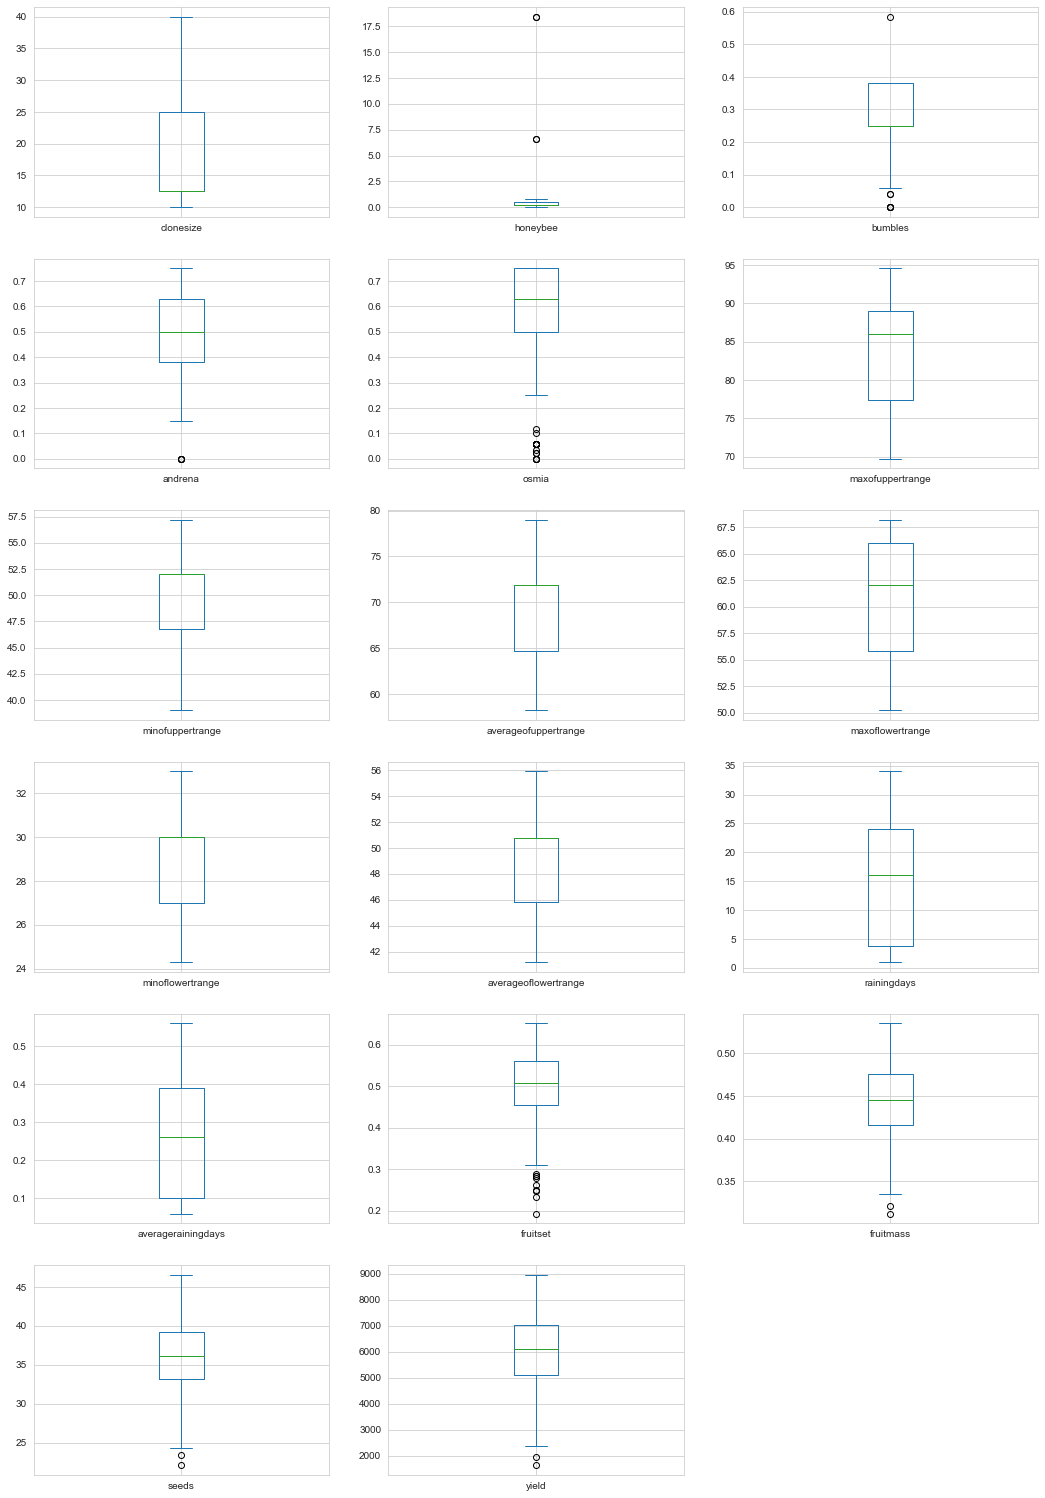

In [181]:
df.plot(kind="box",subplots=True,sharex=False,layout=(6,3),figsize=(18,27))
plt.show()

In [182]:
df.corr()

,clonesize,honeybee,bumbles,andrena,osmia,maxofuppertrange,minofuppertrange,averageofuppertrange,maxoflowertrange,minoflowertrange,averageoflowertrange,rainingdays,averagerainingdays,fruitset,fruitmass,seeds,yield
clonesize,1.000000,0.119745,0.004807,-0.008451,-0.139049,0.034157,0.032854,0.033752,0.034295,0.033768,0.033566,-0.021696,-0.024455,-0.556591,-0.474038,-0.496156,-0.516737
honeybee,0.119745,1.000000,-0.233954,-0.125913,-0.189058,0.026359,0.025467,0.026365,0.026477,0.026104,0.025647,-0.073818,-0.093477,-0.009406,-0.166419,-0.170808,-0.044250
bumbles,0.004807,-0.233954,1.000000,0.010758,0.293665,-0.022863,-0.005801,-0.015821,-0.024662,-0.016801,-0.013985,0.058063,0.075376,0.289890,0.358202,0.380206,0.309407
andrena,-0.008451,-0.125913,0.010758,1.000000,0.387379,-0.026497,-0.023887,-0.025578,-0.026775,-0.025623,-0.025115,0.035297,0.043739,0.102549,0.092470,0.089178,0.140277
osmia,-0.139049,-0.189058,0.293665,0.387379,1.000000,-0.063755,-0.043237,-0.055441,-0.065910,-0.056546,-0.053141,0.083667,0.104188,0.334178,0.336136,0.353116,0.380892
maxofuppertrange,0.034157,0.026359,-0.022863,-0.026497,-0.063755,1.000000,0.990961,0.998314,0.999900,0.998842,0.997658,-0.003286,-0.005677,-0.130450,0.058492,-0.034486,-0.187075
minofuppertrange,0.032854,0.025467,-0.005801,-0.023887,-0.043237,0.990961,1.000000,0.997056,0.988988,0.996267,0.997798,-0.000798,-0.001889,-0.119856,0.067671,-0.024240,-0.175883
averageofuppertrange,0.033752,0.026365,-0.015821,-0.025578,-0.055441,0.998314,0.997056,1.000000,0.997413,0.999944,0.999923,-0.002325,-0.004195,-0.125082,0.064034,-0.028925,-0.181774
maxoflowertrange,0.034295,0.026477,-0.024662,-0.026775,-0.065910,0.999900,0.988988,0.997413,1.000000,0.998071,0.996609,-0.003558,-0.006087,-0.130693,0.058487,-0.034674,-0.187439
minoflowertrange,0.033768,0.026104,-0.016801,-0.025623,-0.056546,0.998842,0.996267,0.999944,0.998071,1.000000,0.999787,-0.002403,-0.004334,-0.126788,0.062093,-0.030727,-0.183339


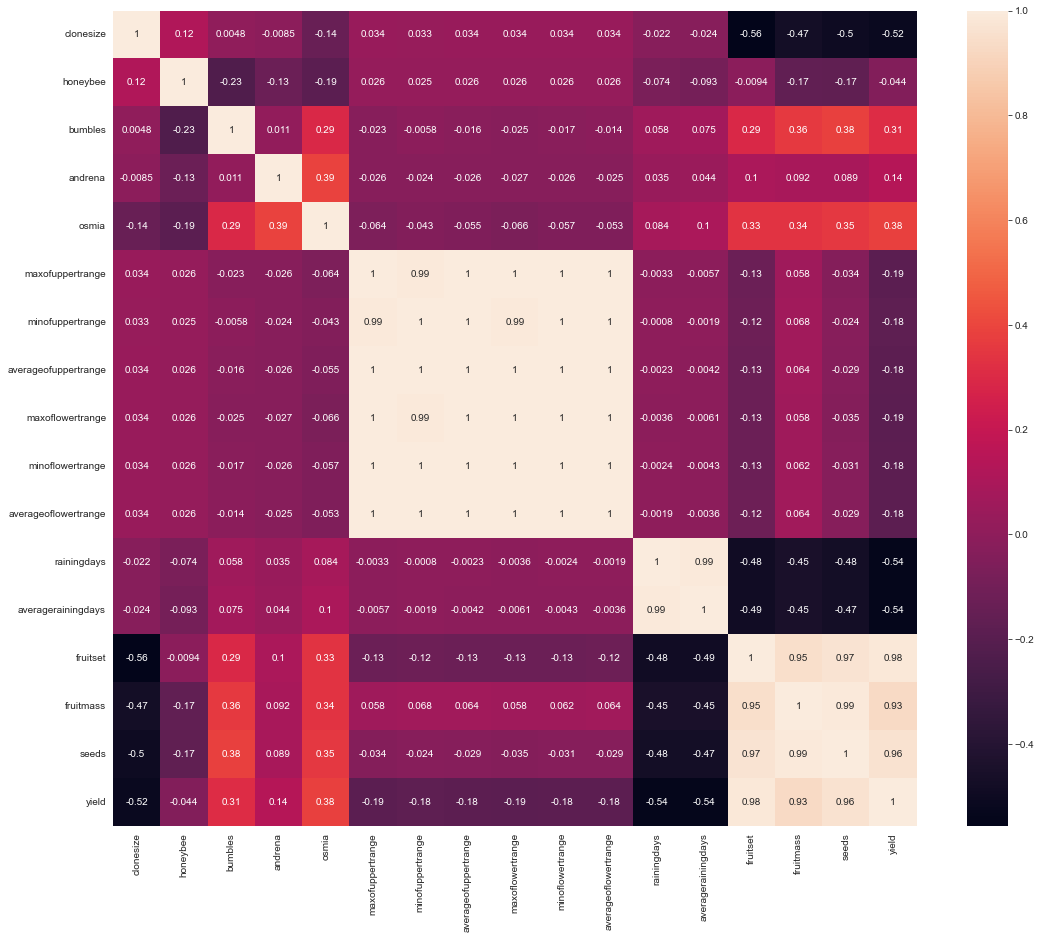

In [183]:
plt.figure(figsize=(18,15))
sns.heatmap(df.corr(),annot=True)
plt.show()

In [184]:
df.drop(['maxofuppertrange','minofuppertrange','maxoflowertrange','minoflowertrange','rainingdays'],axis=1,inplace=True)

In [209]:
df.columns

Index(['clonesize', 'honeybee', 'bumbles', 'andrena', 'osmia',
       'averageofuppertrange', 'averageoflowertrange', 'averagerainingdays',
       'fruitset', 'fruitmass', 'seeds', 'yield'],
      dtype='object')

In [186]:
X = df.drop("yield",axis=1)
y= df["yield"]



C:\Users\Yogesh\AppData\Local\Temp\ipykernel_13024\1552692541.py:5: FutureWarning: Automatic reindexing on DataFrame vs Series comparisons is deprecated and will raise ValueError in a future version. Do `left, right = left.align(right, axis=1, copy=False)` before e.g. `left == right`
  df_iqr=df[~((df<Q1-1.5*IQR)|(df>Q3+1.5*IQR)).any(axis=1)]


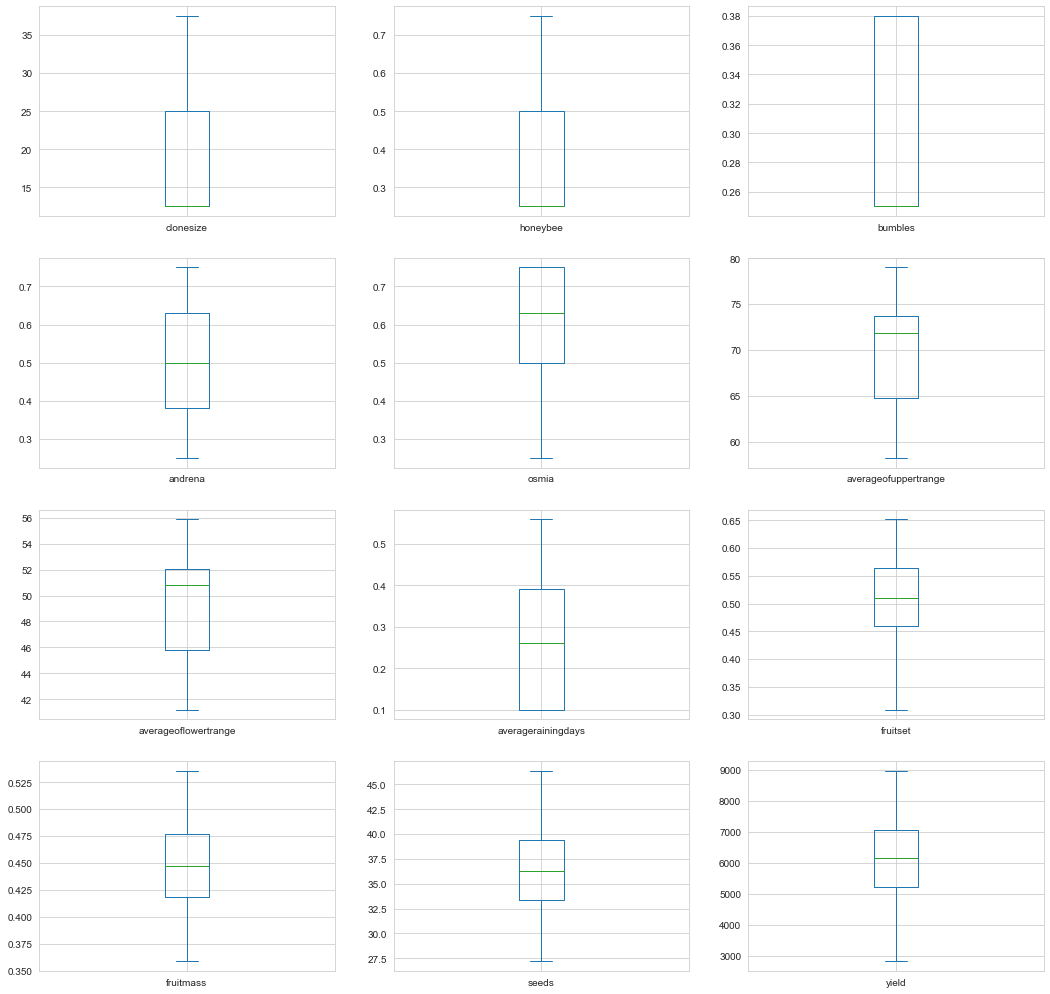

In [187]:
Q1=X.quantile(0.25)
Q3 =X.quantile(0.75)
IQR= Q3-Q1

df_iqr=df[~((df<Q1-1.5*IQR)|(df>Q3+1.5*IQR)).any(axis=1)]


df_iqr.plot(kind="box",subplots=True,sharex=False,layout=(6,3),figsize=(18,27))
plt.show()

In [188]:
# df_zscore = df[np.abs(stats.zscore(df)<3).all(axis=1)]
# df_zscore.plot(kind="box",subplots=True,sharex=False,layout=(6,3),figsize=(18,27))

https://machinelearningmastery.com/feature-selection-for-regression-data/

In [189]:
def select_features(X_train, y_train, X_test, k,score_func):
    if type(k) == str:
        fs = SelectKBest(score_func=score_func, k='all')
    else:
        fs = SelectKBest(score_func=score_func, k = k)
    fs.fit(X_train, y_train)
    X_train_fs = fs.transform(X_train)
    X_test_fs = fs.transform(X_test)

    return X_train_fs, X_test_fs, fs

In [190]:
def plot_info(fs):
    fs_feat_importance =pd.DataFrame(fs.scores_,index=X.columns,columns=["Feature_importance"])
    fs_feat_importance.plot(kind="bar",legend=None)
    plt.grid(False)
    plt.title(f"Feature importance using {fs.score_func.__name__}")
    plt.show()

In [191]:
X = df_iqr.drop("yield",axis=1)
y= df_iqr["yield"]

X_train,X_test,y_train,y_test= train_test_split(X,y,test_size=0.33,random_state=1)

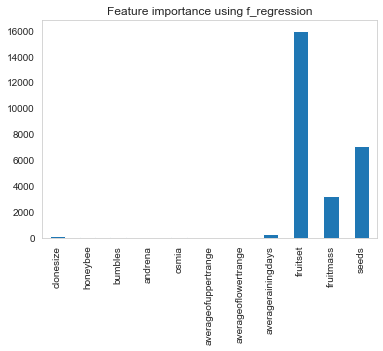

In [192]:
X_train_fs,X_test_fs ,fs= select_features(X_train,y_train,X_test,k="all",score_func=f_regression)
plot_info(fs)

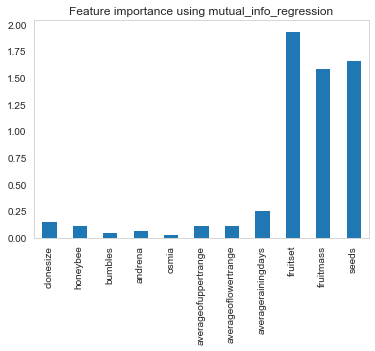

In [193]:
X_train_fs,X_test_fs ,fs= select_features(X_train,y_train,X_test,k="all",score_func=mutual_info_regression)
plot_info(fs)

In [194]:
def evaluate_model(model_name,model,k):

    X_train_fs,X_test_fs ,fs= select_features(X_train,y_train,X_test,k=k,score_func=mutual_info_regression)
    model.fit(X_train_fs,y_train)
    y_pred = model.predict(X_test_fs)
        # evaluate predictions
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test,y_pred)
    rmse = np.sqrt(mse)
    r2 =r2_score(y_test,y_pred)
    # print(40*'*')
    # print(model.get_params())
    # print('MAE: %.3f' % mae)
    # print('MSE: %.3f' % mse)
    # print('RMSE: %.3f' % rmse)
    # print('R2E: %.3f' % r2)
    # print(40*'*')
    return [k,model_name,mae,mse,rmse,r2]


In [195]:
from sklearn.tree import DecisionTreeRegressor
import xgboost as xgb
lr_model=LinearRegression()
xgb_model=xgb.XGBRegressor()
dtree = DecisionTreeRegressor()
rf = RandomForestRegressor()
models={"LR":lr_model,"XGB":xgb_model,"dtree":dtree,"rf":rf}

data=[]
for k in range (7,12):
    print(f"for top {k} features")
    for name,model in models.items():
        datapoint=evaluate_model(name,model,k)
        data.append(datapoint)




for top 7 features
for top 8 features
for top 9 features
for top 10 features
for top 11 features


In [196]:
from tabulate import tabulate
# print (tabulate(data, headers=["k","Model", "MAE", "MSE", "RMSE","R2E"]))

df_model = pd.DataFrame(data,columns=["k","Model", "MAE", "MSE", "RMSE","R2E"])
df_model

,k,Model,MAE,MSE,RMSE,R2E
0,7,LR,113.062594,23149.562386,152.149802,0.986732
1,7,XGB,115.296159,22554.480343,150.181491,0.987073
2,7,dtree,148.600649,37179.761703,192.820543,0.978691
3,7,rf,120.537185,24490.020481,156.492877,0.985964
4,8,LR,112.771864,22992.549633,151.632944,0.986822
5,8,XGB,115.444235,22612.284472,150.373816,0.987040
6,8,dtree,153.259129,38760.999757,196.878134,0.977784
7,8,rf,119.926190,24157.733612,155.427583,0.986154
8,9,LR,106.243707,19207.356178,138.590606,0.988991
9,9,XGB,121.371869,25184.292848,158.695598,0.985566


In [197]:
df_model=df_model[df_model['k']==11]
df_model
df_model.drop("k",axis=1,inplace= True)
df_model=df_model.T
df_model.rename(columns=df_model.iloc[0], inplace = True)

C:\Users\Yogesh\AppData\Local\Temp\ipykernel_13024\205863464.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model.drop("k",axis=1,inplace= True)


<AxesSubplot:>

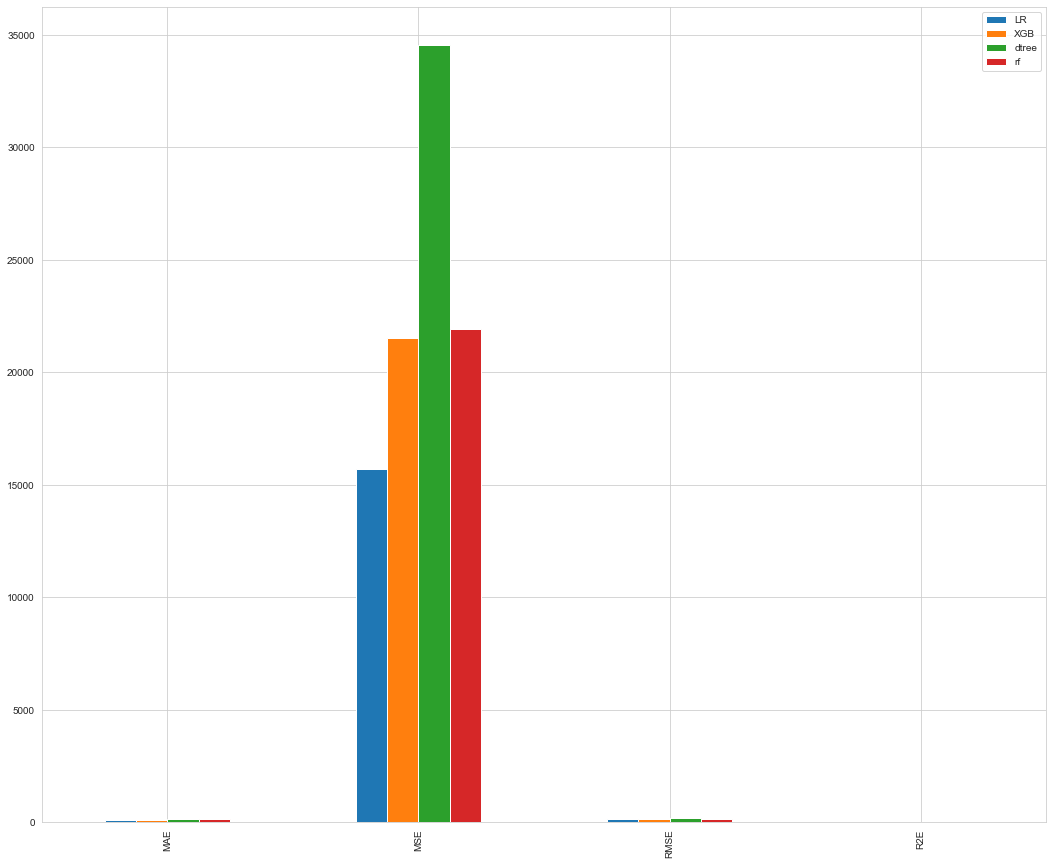

In [203]:
%matplotlib inline

df_model.plot.bar(figsize=(18,15))

In [208]:
#Clearly linear regression is best suited model with top 11 features so we will save the model now.
joblib.dump(lr_model,'..\Model\model.pkl')


['..\\Model\\model.pkl']